<a href="https://colab.research.google.com/github/Haniaakanwal/DIP-TASK/blob/main/Dip_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.signal import wiener

print("Libraries imported successfully!")



Libraries imported successfully!


In [25]:
# Upload image from local system
uploaded = files.upload()
image_name = list(uploaded.keys())[0]
print("Uploaded Image:", image_name)



Saving grayscale-image.jpg to grayscale-image (1).jpg
Uploaded Image: grayscale-image (1).jpg


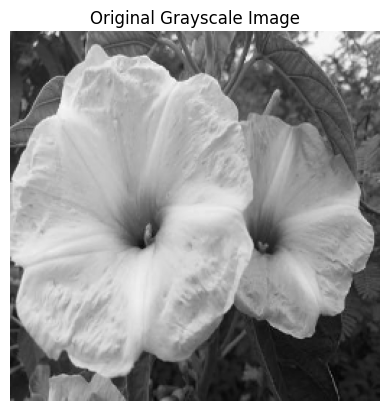

In [26]:
# Read image using OpenCV
image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

# Resize for faster processing
image = cv2.resize(image, (256, 256))

# Display original image
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()



In [28]:
# ---- Gaussian Noise ----
gaussian_noise_img = random_noise(image, mode='gaussian', var=0.01)
gaussian_noise_img = (gaussian_noise_img * 255).astype(np.uint8)

# ---- Salt & Pepper Noise ----
sp_noise_img = random_noise(image, mode='s&p', amount=0.05)
sp_noise_img = (sp_noise_img * 255).astype(np.uint8)

# ---- Motion Blur ----
def motion_blur(img, size=15):
    kernel = np.zeros((size, size))
    kernel[int((size-1)/2), :] = np.ones(size)
    kernel = kernel / size
    return cv2.filter2D(img, -1, kernel)

motion_blur_img = motion_blur(image)



In [29]:
# Convert images to float (range 0-1) for Wiener filter
gaussian_noise_float = gaussian_noise_img.astype(np.float32) / 255.0
motion_blur_float = motion_blur_img.astype(np.float32) / 255.0

# ---- Wiener Filter ----
wiener_gaussian = wiener(gaussian_noise_float, (5,5))
wiener_motion = wiener(motion_blur_float, (5,5))

# Convert back to uint8 for display and PSNR
wiener_gaussian_uint8 = np.clip(wiener_gaussian * 255, 0, 255).astype(np.uint8)
wiener_motion_uint8 = np.clip(wiener_motion * 255, 0, 255).astype(np.uint8)

# ---- Median Filter for Salt & Pepper Noise ----
median_sp = cv2.medianBlur(sp_noise_img, 5)



In [30]:
# Compute PSNR
psnr_gaussian = psnr(image, wiener_gaussian_uint8)
psnr_sp = psnr(image, median_sp)
psnr_motion = psnr(image, wiener_motion_uint8)

print("PSNR Values:")
print("Gaussian Noise + Wiener Filter:", round(psnr_gaussian, 2))
print("Salt & Pepper Noise + Median Filter:", round(psnr_sp, 2))
print("Motion Blur + Wiener Filter:", round(psnr_motion, 2))



PSNR Values:
Gaussian Noise + Wiener Filter: 28.12
Salt & Pepper Noise + Median Filter: 29.79
Motion Blur + Wiener Filter: 23.97


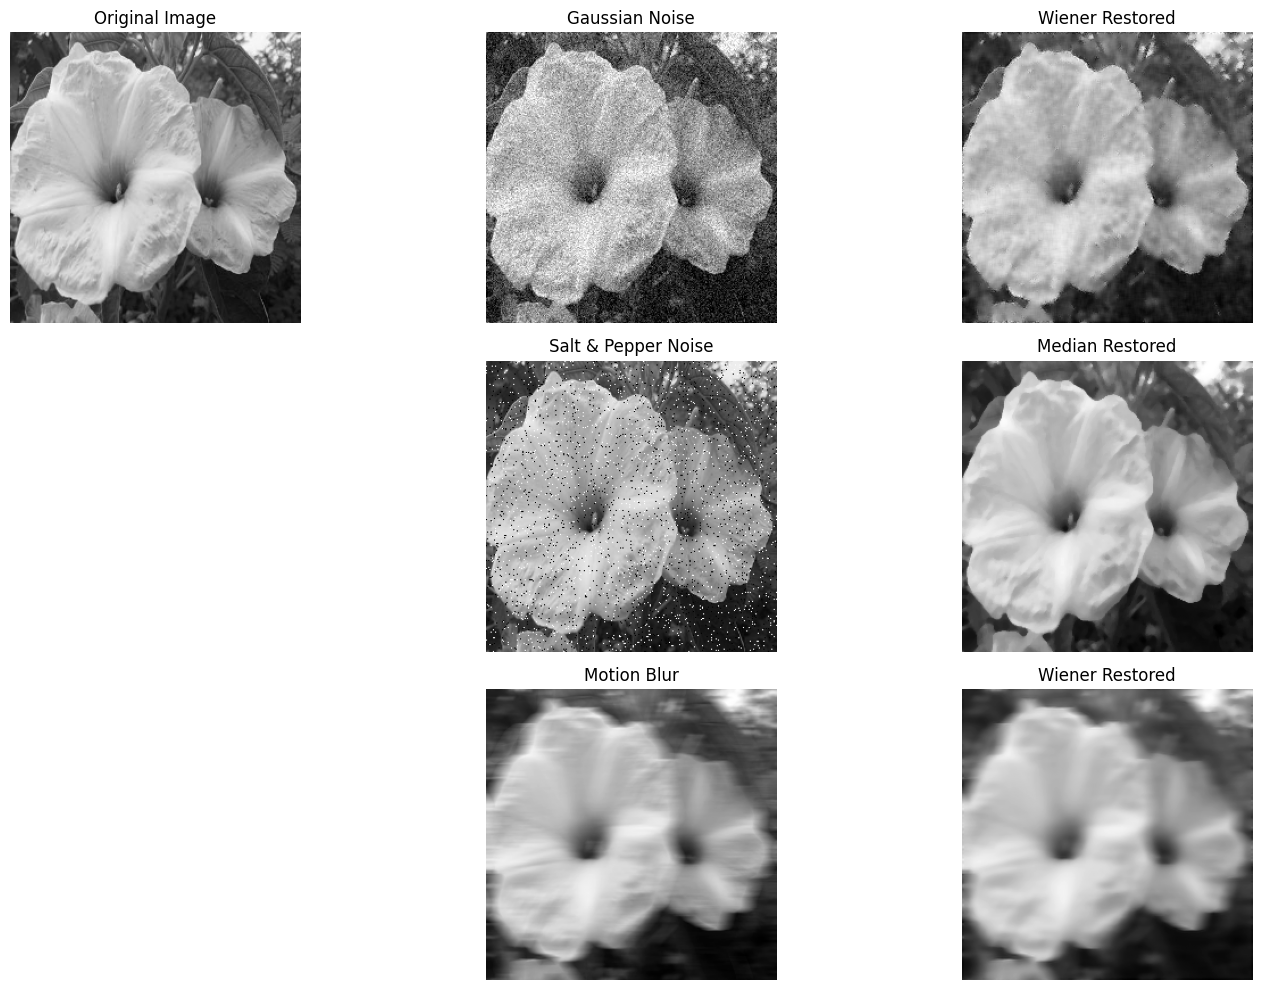

In [31]:
plt.figure(figsize=(15,10))

# Original
plt.subplot(3,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Gaussian Noise
plt.subplot(3,3,2)
plt.imshow(gaussian_noise_img, cmap='gray')
plt.title("Gaussian Noise")
plt.axis("off")

plt.subplot(3,3,3)
plt.imshow(wiener_gaussian_uint8, cmap='gray')
plt.title("Wiener Restored")
plt.axis("off")

# Salt & Pepper
plt.subplot(3,3,5)
plt.imshow(sp_noise_img, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis("off")

plt.subplot(3,3,6)
plt.imshow(median_sp, cmap='gray')
plt.title("Median Restored")
plt.axis("off")

# Motion Blur
plt.subplot(3,3,8)
plt.imshow(motion_blur_img, cmap='gray')
plt.title("Motion Blur")
plt.axis("off")

plt.subplot(3,3,9)
plt.imshow(wiener_motion_uint8, cmap='gray')
plt.title("Wiener Restored")
plt.axis("off")

plt.tight_layout()
plt.show()

